# Book Recommender by Cristian Alberch - Udacity Data Scientist Nanodegree

## Gather - Assess - Clean

# Gather: 

The csv files of interest were downloaded from Github repository:
https://github.com/zygmuntz/goodbooks-10k

- 'books.csv': 
- 'tags.csv'
- 'book_tags.csv'

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

df_ratings = pd.read_csv( 'ratings.csv' )
df_books = pd.read_csv( 'books.csv' )
df_tags = pd.read_csv( 'tags.csv' )
df_book_tags = pd.read_csv( 'book_tags.csv')

# Assess:

### A.1 Book Ratings: Exploratory

In [2]:
df_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [3]:
df_ratings.shape

(5976479, 3)

In [4]:
df_ratings['user_id'].nunique()

53424

In [5]:
df_ratings['book_id'].nunique()

10000

*Another way to summarise this in Pandas:*

In [6]:
df_ratings.agg(['count', 'size', 'nunique'])

,user_id,book_id,rating
count,5976479,5976479,5976479
size,5976479,5976479,5976479
nunique,53424,10000,5


*Over 53,000 users contributed to a total of almost 6 million ratings, for a selection of 10,000 books.*

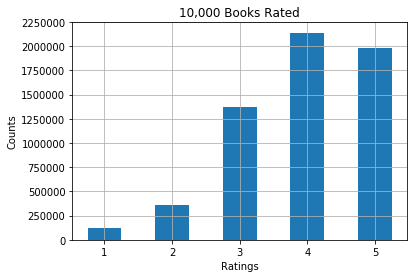

In [7]:
plt.hist(df_ratings['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5],rwidth=0.5);
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.title('10,000 Books Rated')
plt.grid(True)
plt.savefig('book_ratings.png');
plt.show()

*The majority of the ratings are 4 or 5. This is quantified below:*

In [8]:
df_ratings[(df_ratings['rating']==4)|(df_ratings['rating']==5)].count()[0]

4122111

In [9]:
df_ratings[df_ratings['rating']==4|5].count()[0]

1983093

In [10]:
print("Percentage of 4 or 5 ratings:",\
      (df_ratings[(df_ratings['rating']==4)|(df_ratings['rating']==5)].count()[0]/df_ratings['rating'].count()))

Percentage of 4 or 5 ratings: 0.6897223264734972


*Reviewing the amount of data available from each reader*

In [11]:
number_reader_ratings=df_ratings.groupby('user_id')['rating'].count().sort_values()

In [12]:
number_reader_ratings.describe()

count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: rating, dtype: float64

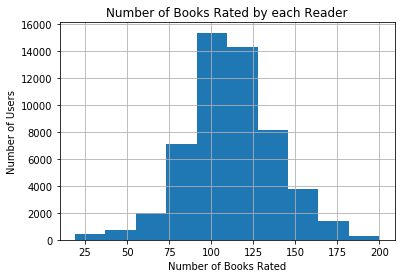

In [13]:
plt.hist(number_reader_ratings);
plt.xlabel('Number of Books Rated')
plt.ylabel('Number of Users')
plt.title('Number of Books Rated by each Reader')
plt.grid(True)
plt.savefig('number_rated.png');
plt.show()

*The dataset shows that the data available from each reader is of very high quality, where all readers have rated at least 19 books, and a maximum of 200; with the median being 111.*

*Reviewing the amount of data available from each book:*

In [14]:
number_book_ratings=df_ratings.groupby('book_id')['rating'].count().sort_values(ascending=False)

In [15]:
number_book_ratings.head()

book_id
1    22806
2    21850
4    19088
3    16931
5    16604
Name: rating, dtype: int64

In [16]:
number_book_ratings.tail()

book_id
9315    36
1935    33
9486    24
9345    11
7803     8
Name: rating, dtype: int64

In [17]:
a=list(number_book_ratings.sort_index().index)

In [18]:
b=list(number_book_ratings.sort_index())


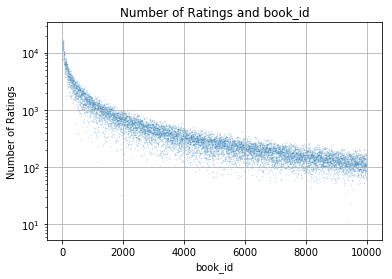

In [19]:
x=list(number_book_ratings.sort_index().index)
y=list(number_book_ratings.sort_index())
# Plot

plt.scatter(x,y,s=0.2,alpha=0.2)
plt.title('Number of Ratings and book_id')
plt.xlabel('book_id')
plt.ylabel('Number of Ratings')
plt.yscale('log')

plt.grid(True)
plt.savefig('number_rated_bookid.png');
plt.show()

*It's apparent that there is a strong correlation between the book_id and the number of times the book was rated. Most likely because the tag is related to the date of entry, and it was longer in the database. This is important to note, as the recommendation engine should not be biased only towards early entry books (which will inevitably have a larger number of ratings than recent additions).*  


In [20]:
most_rated_books=number_book_ratings.index[:20]

In [21]:
print(most_rated_books)

Int64Index([1, 2, 4, 3, 5, 17, 20, 18, 23, 7, 24, 25, 21, 27, 13, 8, 16, 14,
            28, 9],
           dtype='int64', name='book_id')


In [22]:
number_book_ratings.describe()

count    10000.000000
mean       597.647900
std       1267.289788
min          8.000000
25%        155.000000
50%        248.000000
75%        503.000000
max      22806.000000
Name: rating, dtype: float64

In [23]:
bookcount=range(1, 10001)

In [24]:
bookcount

range(1, 10001)

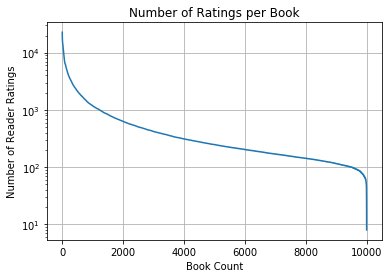

In [25]:
plt.plot(bookcount, number_book_ratings)
plt.xlabel('Book Count')
plt.ylabel('Number of Reader Ratings')
plt.title('Number of Ratings per Book')
plt.yscale('log')
plt.grid(True)
plt.show()

*As it can be seen from the plot and the quartile data, most books have been rated by 100 to 1000 readers.

### A.1 Book Ratings: Assessment of Dataframe with Book Ratings "df_ratings"

- Total of 5,976,479 ratings for 10,000 books gathered from 53,424 users.
- 69% of the book ratings have either 4 or 5 star ratings.
- Number of books rated by the readers: minimum: 19 books; maximum: 200 books; median: 111 books.
- Most books have been rated by 100 to 1000 readers.
- book_id number is relevant as it indicates the length of time it has been in the database.

### A.2 Books: Exploratory

In [26]:
df_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [27]:
df_ratings[df_ratings['book_id']==258].head()

,user_id,book_id,rating
0,1,258,5
163,11,258,3
2580,143,258,4
4848,242,258,5
6225,325,258,4


In [28]:
df_ratings[df_ratings['book_id']==258]['rating'].value_counts()

5    1503
4    1194
3     603
2     167
1      64
Name: rating, dtype: int64

In [29]:
df_books[df_books['book_id']==258]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
257,258,1232,1232,3209783,279,143034901,9.780143e+12,"Carlos Ruiz Zafón, Lucia Graves",2001.0,La sombra del viento,...,263685,317554,24652,4789,11769,42214,101612,157170,https://images.gr-assets.com/books/1344545047m...,https://images.gr-assets.com/books/1344545047s...


*The ratings in df_ratings and in df_books are different. df_ratings refer to the registered 53,000+ readers; whereas the ratings in df_books include from non-registered users. The latter ratings will not be used.*  
*The book_id reference matches in both dataframes*
*The dataframe 'authors' includes information on the author, as well as illustrators and translators.

In [30]:
df_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [31]:
df_books['small_image_url'][1]

'https://images.gr-assets.com/books/1474154022s/3.jpg'

In [32]:
df_books['book_id_diff'] = df_books['goodreads_book_id'] - df_books['best_book_id'] 

In [33]:
len(df_books['book_id_diff'])

10000

In [34]:
df_books.shape

(10000, 24)

In [35]:
df_books['ratings_1'].sum()+df_books['ratings_2'].sum()\
+df_books['ratings_3'].sum()+df_books['ratings_4'].sum()+df_books['ratings_5'].sum()

596873216

In [36]:
df_books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url', 'book_id_diff'],
      dtype='object')

In [37]:
df_books['language_code'].describe()

count     8916
unique      25
top        eng
freq      6341
Name: language_code, dtype: object

In [38]:
df_books['language_code'].unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

In [39]:
df_books.shape

(10000, 24)

In [40]:
df_books['language_code'].isnull().value_counts()

False    8916
True     1084
Name: language_code, dtype: int64

In [41]:
df_books['language_code'].value_counts()

eng      6341
en-US    2070
en-GB     257
ara        64
en-CA      58
fre        25
ind        21
spa        20
ger        13
per         7
jpn         7
pol         6
por         6
en          4
dan         3
nor         3
ita         2
fil         2
vie         1
tur         1
rum         1
rus         1
swe         1
nl          1
mul         1
Name: language_code, dtype: int64

*Of the 10,000 books, there is information on the language for 8916. Of these 8916, 98% are in the English language.
The 'language_code' could provide an insight into a limited number of user preferences. However, the column should be cleaned so that "eng" applies to: "eng", "en-US", "en-GB", "en-CA".*

In [42]:
df_books[df_books['language_code']=='rus']

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,book_id_diff
9883,9884,97390,97390,93879,32,5080039159,9.785080e+12,"Aleksandr Griboyedov, Александр Сергеевич Гриб...",1825.0,Горе от ума,...,9690,36,159,553,1674,2791,4513,https://images.gr-assets.com/books/1342993233m...,https://images.gr-assets.com/books/1342993233s...,0


*Using the assessment data from A.1 "df_ratings" where the most rated books were stored in list "most_rated_books". The titles can be found using the df_books dataframe:


*Most rated books:*

In [43]:
sorted(list(most_rated_books))

[1, 2, 3, 4, 5, 7, 8, 9, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 27, 28]

In [44]:
df_books[df_books['book_id'].isin(most_rated_books)]['title']

0               The Hunger Games (The Hunger Games, #1)
1     Harry Potter and the Sorcerer's Stone (Harry P...
2                               Twilight (Twilight, #1)
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
6                                            The Hobbit
7                                The Catcher in the Rye
8                 Angels & Demons  (Robert Langdon, #1)
12                                                 1984
13                                          Animal Farm
15     The Girl with the Dragon Tattoo (Millennium, #1)
16                 Catching Fire (The Hunger Games, #2)
17    Harry Potter and the Prisoner of Azkaban (Harr...
19                    Mockingjay (The Hunger Games, #3)
20    Harry Potter and the Order of the Phoenix (Har...
22    Harry Potter and the Chamber of Secrets (Harry...
23    Harry Potter and the Goblet of Fire (Harry Pot...
24    Harry Potter and the Deathly Hallows (Harr

*This is not to discard the importance of the first books in the dataset, as the dataset was most likely populated with important, popular books, rather than obscure ones. This is confirmed by the popular titles in A.2*

### A.2 Books: Assessment of Dataframe for 10,000 Books "df_books"

- 'book_id': *This column can be mapped to the df_ratings dataframe. This will require merging both dataframes.*
- 'goodreads_book_id': *This column can be mapped to the df_book_tags dataframe.*
- 'best_book_id': *Data in this column as it will not be used as it does not provide insight into the readers preferences*.
- 'work_id': *Data in this column as it will not be used as it does not provide insight into the readers preferences*
- 'books_count': *Data in this column as it will not be used as it does not provide insight into the readers preferences*
- 'isbn': *Data in this column as it will not be used as it does not provide insight into the readers preferences*
- 'isbn13': *Data in this column as it will not be used as it does not provide insight into the readers preferences*
- 'authors': *This data includes information on the author, as well as illustrators and translators. Only the author is of interest in this dataset.
- 'original_publication_year': *Keep this data.*
- 'original_title': *'title' column can be used instead.
- 'title': *Keep this data.*
- 'language_code': *The book are found in 26 different languange codes, although some are duplicated (eg. 'eng', 'en-US','en-CA',etc.) Keep this column in case it provides useful recommendation information.
- 'average_rating': *Data in this column will not be used as it does not reflect the ratings of the 'registered' approximately 53,000 users included in ratings_df*
- 'ratings_count': *Data in this column will not be used as it does not reflect the ratings of the 'registered' approximately 53,000 users included in ratings_df*
- 'work_ratings_count': *Data in this column will not be used as it does not reflect the ratings of the 'registered' approximately 53,000 users included in ratings_df*
- 'work_text_reviews_count': *Data in this column will not be used as it does not reflect the ratings of the 'registered' approximately 53,000 users included in ratings_df*
- 'ratings_1' to 'ratings_5: *Data in this column will not be used as it does not reflect the ratings of the 'registered' approximately 53,000 users included in ratings_df*
- 'image_url': *This column shows a small image of the book in .jpg.*
- 'small_image_url': *This column shows a very small image of the book in .jpg. 'image_url' can be used instead.*

### A.3 Tags Dictionary: Exploratory

In [45]:
df_tags.sample(5)

,tag_id,tag_name
20662,20662,murder-mystery
10450,10450,elizabeth-kostova
9345,9345,detective-harry-bosch-series
30243,30243,theology-and-philosophy
1367,1367,a-school-for-villains


In [46]:
df_tags.shape

(34252, 2)

### A.3 Tags Dictionary: Assessment of DataFrame for Tags Dictionary "df_tags"

There exists 34,252 unique tags to describe books. 

This dataframe serves as the dictionary of tags.

### A.4 Book Tags: Exploratory

In [47]:
df_book_tags.head(3)

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173


In [48]:
df_book_tags.sample(5)

,goodreads_book_id,tag_id,count
836437,13547289,18640,5
955346,22609391,31656,9
660142,6193821,11646,14
815050,12977172,29025,14
448772,238137,25148,11


*The 'count' column provides the number of times a book has been tagged to a label. The 'count' data will not be used in the book recommendation as it may skew the recommendation to popular books, rather than tag relevance. In other words, a popular book may be tagged more often than a non-popular book, even if the relevance of the tag to the popular book is less than that of the non-popular book.*

In [49]:
df_book_tags['goodreads_book_id'].nunique()

10000

In [50]:
df_book_tags['tag_id'].nunique()

34252

Dataframe df_book_tags uses 'goodreads_book_id' as the book reference, as opposed to dataframes df_books and df_ratings. The tags can be mapped against 'goodreads_book_id'. 

*Everyone of the 10,000 books has been tagged with at least one tag_id reference*

*All 34,252 tag_ids existing in the tag dictionary are used in the 10,000 books.* 

*How are some tags more relevant than others? The below shows the most frequently used tag_id sorted in descending order.*

In [51]:
tag_freq=df_book_tags.groupby('tag_id').count().sort_values('count',ascending=False)['count']

In [52]:
tag_freq.head()

tag_id
30574    9983
11557    9881
22743    9858
5207     9799
8717     9776
Name: count, dtype: int64

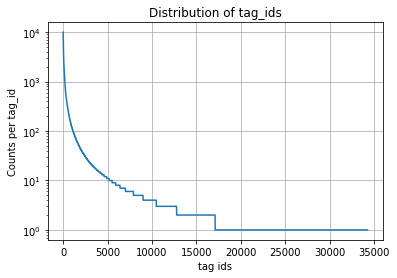

In [53]:
plt.plot(list(tag_freq))
plt.yscale('log')

plt.xlabel('tag ids')
plt.ylabel('Counts per tag_id')
plt.title('Distribution of tag_ids')
plt.grid(True)
plt.show()

*The distribution of tags is massively skewed, as shown in the plot, even when using a logarithmic scale.*

*50% of the total number of tags:*

In [54]:
sum(tag_freq)*0.5

499956.0

*The cumulative sum for number of appearances.*

In [55]:
np.cumsum(tag_freq).head()

tag_id
30574     9983
11557    19864
22743    29722
5207     39521
8717     49297
Name: count, dtype: int64

*By adding the first 150 tags, we have covered over 50% of all the tags being used out of 34,252*

In [56]:
np.cumsum(tag_freq).iloc[150]

506245

In [57]:
print("The top 200 tags, cover", 100 * np.cumsum(tag_freq).iloc[200] / sum(tag_freq),"% of all the tags")

The top 200 tags, cover 55.891618462424695 % of all the tags


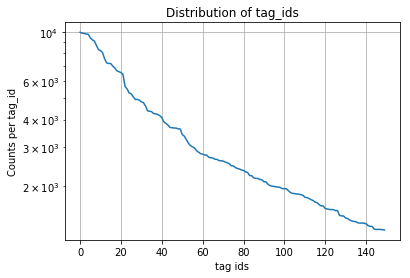

In [58]:
plt.plot(list(tag_freq[:150]))
plt.yscale('log')

plt.xlabel('tag ids')
plt.ylabel('Counts per tag_id')
plt.title('Distribution of tag_ids')
plt.grid(True)
plt.show()

*The top 20 tags used in alphabetical order are shown*.

*As it can be seen, most tag_name categories are not useful for recommendation purposes (eg. default, i-own, etc). Many others need cleaning (eg. ebook and ebooks).*

*Due to the small number of useful tags, the top 200 categories can be manually classified as useful or not, and cleaned without much difficulty.*

##### Top 20 tag categories:

In [59]:
df_tags[df_tags['tag_id'].isin(list(tag_freq.index[:20]))]

,tag_id,tag_name
1642,1642,adult
3389,3389,audiobook
3392,3392,audiobooks
5207,5207,books-i-own
8717,8717,currently-reading
9221,9221,default
10197,10197,ebook
10210,10210,ebooks
11557,11557,favorites
11743,11743,fiction


##### Top 200 tag categories:

In [60]:
#change maximum number of rows to display in Jupyter notebook.
pd.options.display.max_rows = 200

In [61]:
popular_tags=df_tags[df_tags['tag_id'].isin(list(tag_freq.index[:200]))]

In [62]:
popular_tags

,tag_id,tag_name
722,722,2013-reads
751,751,2014-reads
783,783,2015-reads
831,831,2016-reads
923,923,20th-century
1010,1010,3-stars
1078,1078,4-stars
1128,1128,5-stars
1416,1416,abandoned
1540,1540,action


*The top 200 most popular tags were analysed with the list below showing the most representative samples for book recommendation purposes.*

##### List of Useful Tags for Book Recommendations:

	
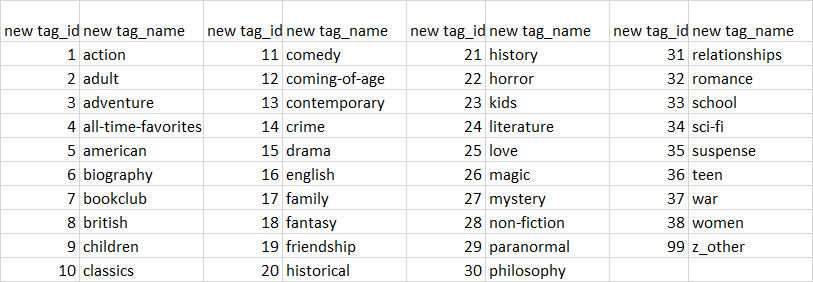

In [63]:
# reset back to normal
pd.reset_option('display.max_rows')

### A.4 Book Tags: Assessment of DataFrame showing Books and their Tagging "df_book_tags"

- Each of the book is tag multiple times against a tag.
- The top 200 tag_ids can provide an insight for book recommendation purposes.
- *The 'count' column provides the number of times a book has been tagged to a label. The 'count' data will not be used in the book recommendation as it may skew the recommendation to popular books, rather than tag relevance. In other words, a popular book may be tagged more often than a non-popular book, even if the relevance of the tag to the popular book is less than that of the non-popular book.
- Upon replacement of old tags to new tags. Many books will be tagged multiple times. The book tags can be simplified by dropping the duplicate tags.
- All 10,000 books have been tagged as 99 (other) at least once. Including this tag does not provide additional information. All rows with new_tag_id are dropped*

# Clean: 

### Define 

###### df_books:
- 'best_book_id': *Drop this column*.
- 'work_id': *Drop this column*.
- 'books_count': *Drop this column*.
- 'isbn': *Drop this column*.
- 'isbn13': *Drop this column*.
- 'authors': *Keep first element (author), and drop the rest."
- 'original_title': *Drop this column*.
- 'language_code': *Change "en-US", "en-GB", "en-CA" to "eng". 
- 'average_rating': *Drop this column*.
- 'ratings_count': *Drop this column*.
- 'work_ratings_count': *Drop this column*.
- 'work_text_reviews_count': *Drop this column*.
- 'ratings_1' to 'ratings_5: *Drop these columns*.
- 'small_image_url': *Drop this column*.  

###### df_book_tags:
- 'count': *Drop this column*.   

###### df_book_tags and df_tags:
- Old tag_id to be changed to new_tag_id.  
{1540	:	1	,
1542	:	1	,
1642	:	2	,
1659	:	2	,
1691	:	3	,
2104	:	4	,
2277	:	5	,
31656	:	5	,
4605	:	6	,
4949	:	7	,
4959	:	7	,
4985	:	7	,
5051	:	7	,
5751	:	8	,
6828	:	9	,
6857	:	9	,
6888	:	9	,
6895	:	9	,
6953	:	9	,
6960	:	9	,
7404	:	10	,
7457	:	10	,
7725	:	11	,
12680	:	11	,
15048	:	11	,
15067	:	11	,
7852	:	12	,
8055	:	13	,
8067	:	13	,
8076	:	13	,
20288	:	13	,
8517	:	14	,
8527	:	14	,
8533	:	14	,
9336	:	14	,
9886	:	15	,
10641	:	16	,
10644	:	16	,
11221	:	17	,
11305	:	18	,
31617	:	18	,
12600	:	19	,
14467	:	20	,
14487	:	20	,
14552	:	21	,
14821	:	22	,
16799	:	23	,
17124	:	23	,
17129	:	23	,
18318	:	24	,
18326	:	24	,
18367	:	24	,
18640	:	25	,
18886	:	26	,
20926	:	27	,
20939	:	27	,
20957	:	27	,
20989	:	27	,
20994	:	27	,
21689	:	28	,
21773	:	28	,
22973	:	29	,
29011	:	29	,
23471	:	30	,
25630	:	31	,
26138	:	32	,
14370	:	33	,
26735	:	33	,
11370	:	34	,
11376	:	34	,
26771	:	34	,
26785	:	34	,
26816	:	34	,
26837	:	34	,
26842	:	34	,
26894	:	34	,
26897	:	34	,
29076	:	35	,
29083	:	35	,
30358	:	35	,
30386	:	35	,
29452	:	36	,
32996	:	36	,
33009	:	36	,
33012	:	36	,
33114	:	36	,
33124	:	36	,
33165	:	36	,
32130	:	37	,
32686	:	38}  
  
If tag is other than those listed, then tag_id=99.  

- new_tag_id tag name to be changed to new_tag_name:  
{1	:	action	,
2	:	adult	,
3	:	adventure	,
4	:	all-time-favorites	,
5	:	american	,
6	:	biography	,
7	:	bookclub	,
8	:	british	,
9	:	children	,
10	:	classics	,
11	:	comedy	,
12	:	coming-of-age	,
13	:	contemporary	,
14	:	crime	,
15	:	drama	,
16	:	english	,
17	:	family	,
18	:	fantasy	,
19	:	friendship	,
20	:	historical	,
21	:	history	,
22	:	horror	,
23	:	kids	,
24	:	literature	,
25	:	love	,
26	:	magic	,
27	:	mystery	,
28	:	non-fiction	,
29	:	paranormal	,
30	:	philosophy	,
31	:	relationships	,
32	:	romance	,
33	:	school	,
34	:	sci-fi	,
35	:	suspense	,
36	:	teen	,
37	:	war	,
38	:	women	,
99	:	z_other	}

###### df_book_tags and df_tags:
- Merge these 2 dataframes.
- Drop duplicate rows where the same tag appears more than once per book.
- Drop rows with tag_id = 99 (other) 

### Code:

In [64]:
df_books.head(1)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,book_id_diff
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,0


In [65]:
df_books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url', 'book_id_diff'],
      dtype='object')

In [66]:
# df_books cleaning:

# Drop columns that will not be useful for book recommendations:
df_books=df_books.drop(labels=['best_book_id','work_id','books_count','isbn','isbn13','original_title',
                               'average_rating','ratings_count','work_ratings_count','work_text_reviews_count',
                               'ratings_1','ratings_2','ratings_3','ratings_4','ratings_5','small_image_url'],axis=1)  

In [67]:
# df_books cleaning:

# Standardise language code for english:
df_books['language_code'].replace({'en-US':'eng','en-GB':'eng','en-CA':'eng'}, inplace=True)


In [68]:
# df_books cleaning:

# Drop secondary names under authors.
df_books['authors']=df_books['authors'].str.split(',',expand=True)[0]

In [69]:
# df_book_tags cleaning:

# Drop columns that will not be useful for book recommendations:
df_book_tags=df_book_tags.drop(labels=['count'],axis=1)

In [70]:
# df_book_tags and df_tags:

new_tag_id_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,\
                 21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]

new_tag_name_dic={1:'action', 2:'adult', 3:'adventure', 4:'all-time-favorites', 5:'american', 6:'biography', 
                  7:'bookclub', 8:'british', 9:'children', 10:'classics', 11:'comedy', 12:'coming-of-age', 
                  13:'contemporary', 14:'crime', 15:'drama', 16:'english', 17:'family', 18:'fantasy', 
                  19:'friendship', 20:'historical', 21:'history', 22:'horror', 23:'kids', 24:'literature', 25:'love', 
                  26:'magic', 27:'mystery', 28:'non-fiction', 29:'paranormal', 30:'philosophy', 31:'relationships', 
                  32:'romance', 33:'school', 34:'sci-fi', 35:'suspense', 36:'teen', 37:'war', 38:'women', 99:'z_other'}

new_tag_id_dic={1540:1, 1542:1, 1642:2, 1659:2, 1691:3, 2104:4, 2277:5, 31656:5, 4605:6, 4949:7, 4959:7, 4985:7, 
                5051:7, 5751:8, 6828:9, 6857:9, 6888:9, 6895:9, 6953:9, 6960:9, 7404:10, 7457:10, 7725:11, 12680:11, 
                15048:11, 15067:11, 7852:12, 8055:13, 8067:13, 8076:13, 20288:13, 8517:14, 8527:14, 8533:14, 9336:14, 
                9886:15, 10641:16, 10644:16, 11221:17, 11305:18, 31617:18, 12600:19, 14467:20, 14487:20, 14552:21, 
                14821:22, 16799:23, 17124:23, 17129:23, 18318:24, 18326:24, 18367:24, 18640:25, 18886:26, 20926:27, 
                20939:27, 20957:27, 20989:27,  20994:27, 21689:28, 21773:28, 22973:29, 29011:29, 23471:30, 25630:31, 
                26138:32, 14370:33, 26735:33, 11370:34, 11376:34, 26771:34, 26785:34, 26816:34, 26837:34, 26842:34, 
                26894:34, 26897:34, 29076:35, 29083:35, 30358:35, 30386:35, 29452:36, 32996:36, 33009:36, 33012:36, 
                33114:36, 33124:36, 33165:36, 32130:37, 32686:38}

df_book_tags['new_tag_id']=df_book_tags['tag_id'].replace(new_tag_id_dic)

#If tag is other than those listed, then tag_id=99. 
df_book_tags.loc[~df_book_tags['new_tag_id'].isin(new_tag_id_list), 'new_tag_id']=99

#create a column for tag ids:
df_tags['new_tag_id']=df_tags['tag_id'].replace(new_tag_id_dic)  

#create a column for tag ids. This will be replaced by dictionary values with the tag name.
df_book_tags['new_tag_name']=df_book_tags['new_tag_id']
df_book_tags=df_book_tags.replace({'new_tag_name': new_tag_name_dic})

#drop tags that are duplicated across a same book_id
df_book_tags = df_book_tags.sort_values('goodreads_book_id', ascending=True) #sort according to book_id

#drop the duplicate tag_ids when duplicated within a book.
df_book_tags = df_book_tags.drop_duplicates(subset=['new_tag_id','goodreads_book_id'], keep='first')

#drop the rows containing 99 (eg. other) as all books have been tagged at least once as other. This tag does not
#provide additional information
df_book_tags = df_book_tags[df_book_tags['new_tag_id'] != 99] 

#drop old tag_id column.
df_book_tags = df_book_tags.drop('tag_id', 1)

#rename the columns to be consistent with the other dataframes.
df_book_tags = df_book_tags.rename(columns={'new_tag_id':'tag_id','new_tag_name': 'tag_name','goodreads_book_id':'book_id'})

tag_count=df_book_tags.groupby('tag_name')['book_id'].count().sort_values(ascending=False)

In [71]:
df_book_tags.head()

,book_id,tag_id,tag_name
72,1,36,teen
69,1,23,kids
63,1,34,sci-fi
57,1,9,children
52,1,27,mystery


### Test:

In [72]:
df_books.head()

,book_id,goodreads_book_id,authors,original_publication_year,title,language_code,image_url,book_id_diff
0,1,2767052,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,https://images.gr-assets.com/books/1447303603m...,0
1,2,3,J.K. Rowling,1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,https://images.gr-assets.com/books/1474154022m...,0
2,3,41865,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",eng,https://images.gr-assets.com/books/1361039443m...,0
3,4,2657,Harper Lee,1960.0,To Kill a Mockingbird,eng,https://images.gr-assets.com/books/1361975680m...,0
4,5,4671,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,https://images.gr-assets.com/books/1490528560m...,0


In [73]:
df_books.shape

(10000, 8)

In [74]:
df_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [75]:
df_ratings.shape

(5976479, 3)

In [76]:
df_book_tags.head()

,book_id,tag_id,tag_name
72,1,36,teen
69,1,23,kids
63,1,34,sci-fi
57,1,9,children
52,1,27,mystery


In [77]:
df_book_tags.shape

(99265, 3)

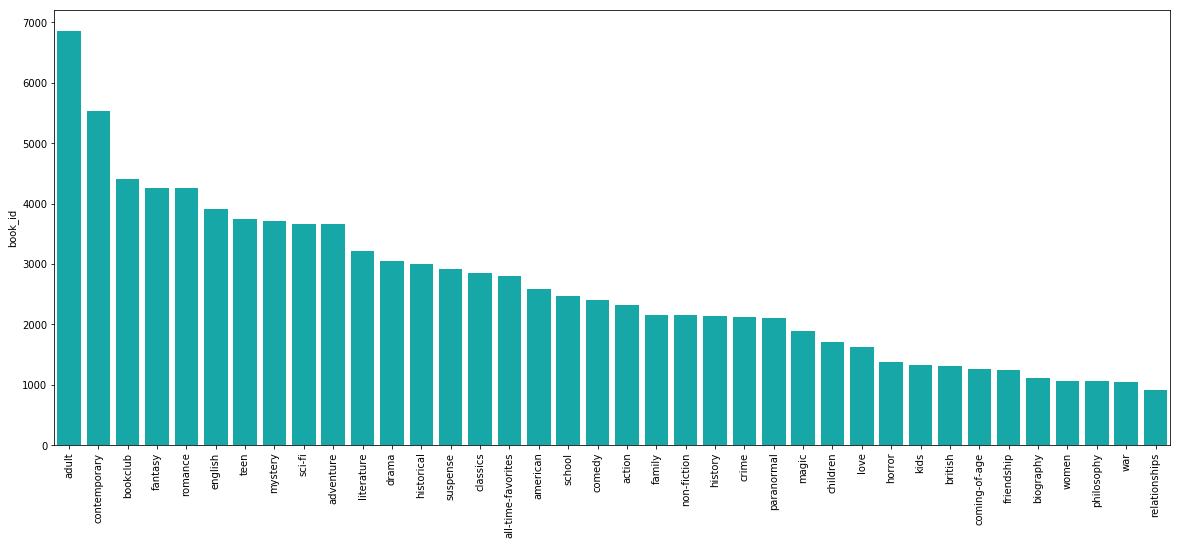

In [85]:
plt.figure(figsize=(20,8))
sns.barplot(x=list(tag_count.index), y=tag_count,order=list(tag_count.index),color="c")
plt.xticks(rotation=90)

plt.savefig('genres.png');

In [79]:
tag_count[1:]

tag_name
contemporary          5532
bookclub              4402
fantasy               4263
romance               4252
english               3918
teen                  3753
mystery               3715
sci-fi                3662
adventure             3662
literature            3209
drama                 3048
historical            2997
suspense              2919
classics              2845
all-time-favorites    2801
american              2590
school                2478
comedy                2402
action                2331
family                2161
non-fiction           2153
history               2139
crime                 2127
paranormal            2101
magic                 1898
children              1714
love                  1620
horror                1374
kids                  1330
british               1306
coming-of-age         1268
friendship            1239
biography             1110
women                 1064
philosophy            1057
war                   1045
relationships      

(array([10.,  4.,  8.,  6.,  4.,  4.,  0.,  1.,  0.,  1.]),
 array([ 923. , 1516.4, 2109.8, 2703.2, 3296.6, 3890. , 4483.4, 5076.8,
        5670.2, 6263.6, 6857. ]),
 <a list of 10 Patch objects>)

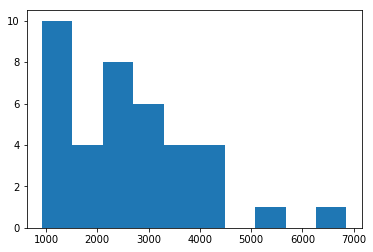

In [80]:
plt.hist(tag_count)

In [81]:
df_tags.head()

,tag_id,tag_name,new_tag_id
0,0,-,0
1,1,--1-,1
2,2,--10-,2
3,3,--12-,3
4,4,--122-,4


*df_tags will no longer be used as the useful tag name data is stored in df_book_tags.*  
*For brevity, the name df_tags will be used instead of df_book_tags*

In [82]:
df_ratings.shape

(5976479, 3)

In [83]:
df_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [84]:
#Save Clean datasets into csv files
df_books.to_csv(r'df_books.csv',index=False)
df_ratings.to_csv(r'df_ratings.csv',index=False)
df_book_tags.to_csv(r'df_tags.csv',index=False)